In [ ]:
from google.colab import files
uploaded = files.upload()
import numpy as np

Saving nsfg.hdf5 to nsfg.hdf5


**The given case study aims to find out the insights of birth of new born babies at the time of birth** 
**We will use nsfg dataset and variable insights will be taken from nsfg codebook 2013-2015**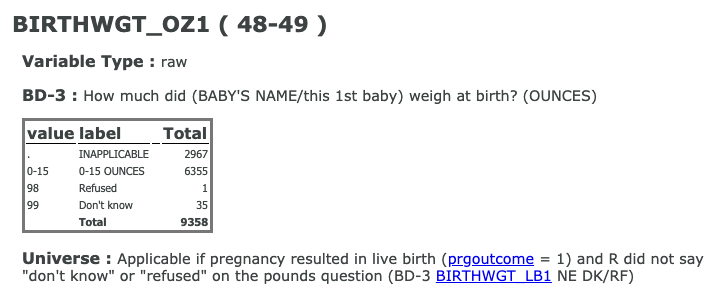

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
nsfg=pd.read_hdf('nsfg.hdf5')

In [ ]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [ ]:
nsfg.shape

(9358, 10)

In [ ]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

**We will take two variables birthweight in ounces and pounds**

In [ ]:
ounces = nsfg['birthwgt_oz1']
pounds=nsfg['birthwgt_lb1']

In [ ]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

**the values 98,99 seems to be outlier as this weight of babies at the time of birth is not possible**

In [ ]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

**The value of mean is not calculated prooperly due to outliers**


In [ ]:
pounds=pounds.replace([98,99],np.nan)
pounds.describe()

count    6390.000000
mean        6.703286
std         1.429265
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: birthwgt_lb1, dtype: float64

In [ ]:
birthweight=pounds+ounces/16

**The column 'nbrnaliv' denotes the number of babies born alive at end of pregnancy from the codebook documentation and value 8 corresponds to refuse response so we will replace it by null value**

In [ ]:
nsfg['nbrnaliv'].replace(8, np.NaN, inplace=True)

In [ ]:
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


**The variable age con and agepreg are misrecorded as integers instead of floats with two decimals so will convert it **

In [ ]:
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100
preg_length = agepreg - agecon
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

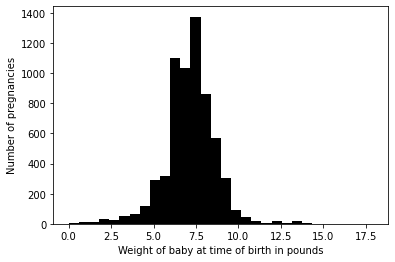

In [ ]:
plt.hist(birthweight.dropna(),bins=30,color='k')
plt.xlabel('Weight of baby at time of birth in pounds')
plt.ylabel('Number of pregnancies')

plt.show()

From the distribution it can be seen that most of the births lie in the value near to 7.5 lbs


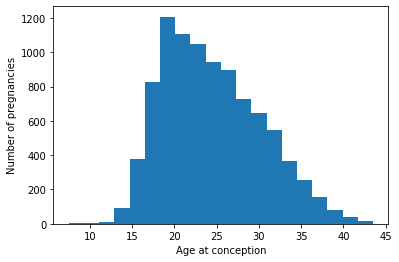

In [ ]:

plt.hist(agecon,bins=20)

plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

plt.show()

From the distribution it can be seen that age at time of conception lies majorily between 17 -30 years

In [ ]:
## Weight of babies with pregrancty length for full term babies
full_term = nsfg['prglngth'] >= 37
full_term_weight = birthweight[full_term]
print(full_term_weight.mean())

7.405266509004912


The values lies close to mean values 

In [ ]:
'''Since twins have effect on distribution the below code demonstrates the mean effect'''

# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv']==1

# Compute birth weight for single full-term babies
single_full_term_weight = birthweight[full_term  & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birthweight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.4187798055759355
Multiple full-term mean: 5.768055555555556
